In [2]:
#Step 1: Load the dataset from your local path
# Import necessary libraries
import pandas as pd

# Load the dataset from your local path
df = pd.read_csv(r'C:\Users\Swayam\customer-churn-prediction\data\raw\Churn_Modelling.csv')

# Display the first few rows of the dataset
df.head()

# Check the structure of the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Step 2: Define Features and Target
# Define the features (X) and target (y)
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable (churn)

# Display the shapes of X and y
print(X.shape)
print(y.shape)

#Step 3: Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(X_train.shape, X_test.shape)


(10000, 11)
(10000,)
(8000, 11) (2000, 11)


In [9]:
#Step 4: Build a Logistic Regression Model
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=2000)  # Increased the number of iterations

# Train the model with scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8110
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

[[1543   64]
 [ 314   79]]


In [ ]:
Accuracy: 0.8110
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

[[1543   64]
 [ 314   79]]

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('data/raw/Churn_Modelling.csv')

# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Define features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the distribution of the classes
print("Original training set size:", y_train.value_counts())
print("Resampled training set size:", pd.Series(y_train_resampled).value_counts())

# Initialize the logistic regression model
model = LogisticRegression(max_iter=2000)

# Train the model with the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Original training set size: Exited
0    6356
1    1644
Name: count, dtype: int64
Resampled training set size: Exited
0    6356
1    6356
Name: count, dtype: int64
Accuracy: 0.7210
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

[[1163  444]
 [ 114  279]]


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8370
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.59      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000

[[1442  165]
 [ 161  232]]


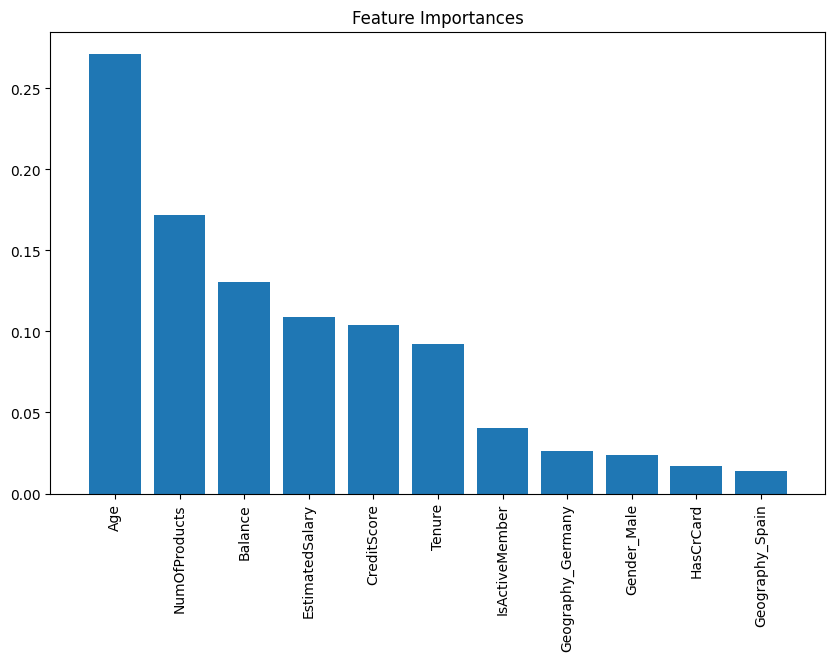

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate model with cross-validation
scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f"Cross-validated F1 scores: {scores}")
print(f"Mean F1 score: {scores.mean()}")


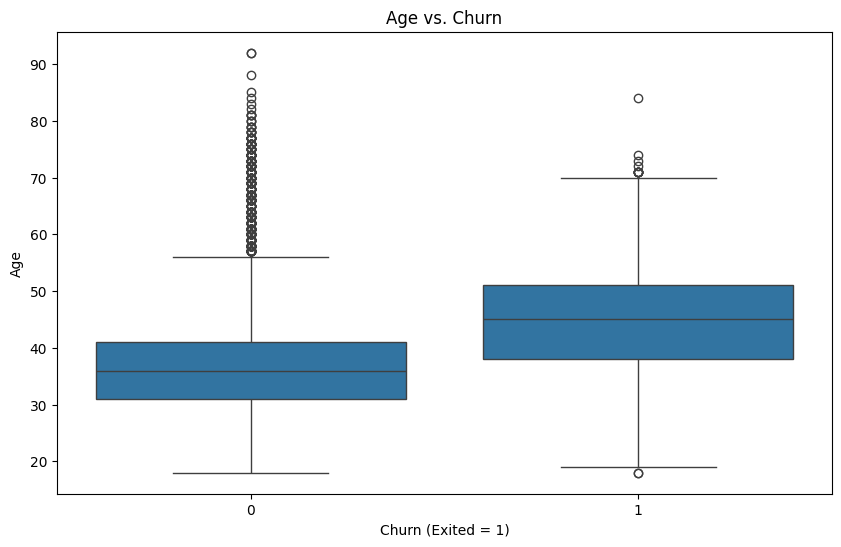

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with age and churn data
analysis_df = pd.DataFrame({'Age': df['Age'], 'Exited': df['Exited']})

# Plot Age vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=analysis_df)
plt.title('Age vs. Churn')
plt.xlabel('Churn (Exited = 1)')
plt.ylabel('Age')
plt.show()


C:\Users\Swayam\AppData\Local\Temp\ipykernel_18144\3071046711.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby('AgeGroup')['Exited'].mean()


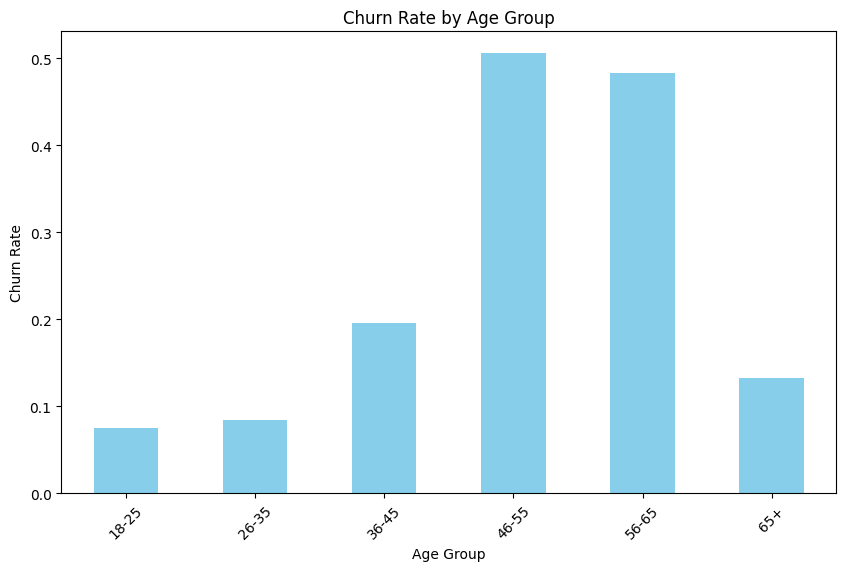

In [7]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot churn rate by age group
churn_rate_by_age_group = df.groupby('AgeGroup')['Exited'].mean()
churn_rate_by_age_group.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Assuming df_processed is your final DataFrame after preprocessing
import pandas as pd

# Example DataFrame (replace this with your actual processed DataFrame)
df_processed = df.copy()  # Make a copy of the original DataFrame

# Save the processed DataFrame to a CSV file
output_path = 'data/processed/processed_churn_data.csv'
df_processed.to_csv(output_path, index=False)

print(f'Processed data saved to {output_path}')
import os

# Create the directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)


Processed data saved to data/processed/processed_churn_data.csv
